
I'm trying to get murders per 100,000 inhabitants per US state per race. I need this because I need two populations to compare. I have UNODC murder rates for the US as a whole, African–Americans as percentage of total population (1790–2010) by U.S. state, White American population as of 2000 and 2010 censuses, and a year common to each of these tables. How do I get the rate per race per state from that?

If you are curious about the choice of subject matter, I'm trying to disprove things with simple statistics. Generally, Nazi pseudoscience about genetics and race and Marxist pseudoscience about the malleability of human nature. In this case, it's the idea that homicide rate correlates with the continent your ancestors evolved on. It's mostly a disappointing exercise trying to simplify something that is complex, but I'm merely trying to show that simple, ideologically motivated ideas don't hold up. And these exercises that I am giving myself are good practice.

In [18]:

%run ../../load_magic/storage.py
%run ../../load_magic/dataframes.py
%pprint
%who

# https://www.kaggle.com/jyzaguirre/us-homicide-reports/version/2
homicides_df = load_csv('U.S._Homicide_Reports,_1980-2014_Homicides_between_1980_and_2014')

DATA_FOLDER: ../data/
SAVES_FOLDER: ../saves/
Pretty printing has been turned ON
DATA_FOLDER	 ENCODING_TYPE	 HTML	 SAVES_FOLDER	 attempt_to_pickle	 example_iterrows	 get_column_descriptions	 homicides_df	 html_str	 
load_csv	 load_dataframes	 load_object	 math	 notebook_path	 notebook_viewer_url	 os	 pd	 pickle	 
rate_by_state_df	 save_dataframes	 store_objects	 tables_df_list	 tables_url	 wiki_url	 


In [19]:

homicides_df.columns

Index(['Record ID', 'Agency Code', 'Agency Name', 'Agency Type', 'City',
       'State', 'Year', 'Month', 'Incident', 'Crime Type', 'Crime Solved',
       'Victim Sex', 'Victim Age', 'Victim Race', 'Victim Ethnicity',
       'Perpetrator Sex', 'Perpetrator Age', 'Perpetrator Race',
       'Perpetrator Ethnicity', 'Relationship', 'Weapon', 'Victim Count',
       'Perpetrator Count', 'Record Source'],
      dtype='object')

In [20]:

len(homicides_df['State'].unique())

51

In [21]:

wiki_url = 'https://en.wikipedia.org/wiki/'
tables_url = '{}List_of_U.S._states_by_homicide_rate'.format(wiki_url)
tables_df_list = pd.read_html(tables_url)

In [22]:

rate_by_state_df = tables_df_list[0].dropna(axis=0, how='all').dropna(axis=1, how='all')
rate_by_state_df.columns = rate_by_state_df.iloc[0]
rate_by_state_df = rate_by_state_df.iloc[1:].T
rate_by_state_df.columns = rate_by_state_df.iloc[0]
rate_by_state_df = rate_by_state_df.iloc[1:].T
rate_by_state_df.columns = rate_by_state_df.columns.map(lambda x: int(x))
rate_by_state_df.head(5).T.head(5).T

,2017,2014,2010,2005,2000
State,,,,,
Alabama,8.3,5.7,5.7,8.2,7.4
Alaska,8.4,5.6,4.3,4.8,4.3
Arizona,5.9,4.7,6.4,7.5,7
Arkansas,8.6,5.6,4.6,6.7,6.3
California,4.6,4.4,4.8,6.9,6.1


In [23]:

wiki_url = 'https://en.wikipedia.org/wiki/'
us_pop_df = pd.DataFrame([])
year_set = set([1980, 1990, 2000])
for year in year_set:
    try:
        tables_url = '{}{}_United_States_Census'.format(wiki_url, year)
        tables_df_list = pd.read_html(tables_url)

        pop_df = tables_df_list[1].dropna(axis=0, how='all').dropna(axis=1, how='all')
        pop_df.columns = pop_df.iloc[0]
        pop_df = pop_df.iloc[1:].T
        pop_df.columns = pop_df.iloc[1]
        pop_df = pop_df.iloc[range(0, 3, 2)].T
        
        pop_df.columns = ['Rank_{}'.format(year), 'Population_{}'.format(year)]
        us_pop_df = pd.merge(left=us_pop_df, right=pop_df, how='outer',
                             left_index=True, right_index=True)
    except Exception as e:
        print(e)
us_pop_df = us_pop_df.dropna()

In [24]:

dtype_df = get_column_descriptions(us_pop_df)
match_series = (dtype_df['only_integers'] == True)

In [25]:

for column_name in dtype_df[match_series]['column_name']:
    us_pop_df[column_name] = us_pop_df[column_name].map(lambda x: int(x))

In [26]:

year_set = set([1980, 1990, 2000])
max_year = max(set(homicides_df['Year'].unique()) & year_set)

In [27]:

homicides_df['Crime Type'].unique()

array(['Murder or Manslaughter', 'Manslaughter by Negligence'],
      dtype=object)

In [28]:

column_list = ['State', 'Year', 'Perpetrator Race']
homicides_df[column_list].sample(5).T.tail(15).T

,State,Year,Perpetrator Race
48963,Florida,1982,Black
530050,South Carolina,2007,Black
260635,Oklahoma,1992,Unknown
637489,Texas,2014,Black
613314,Georgia,2012,Black


In [29]:

homicides_df.sample(5).T

,556910,242253,194254,598232,325843
Record ID,556911,242254,194255,598233,325844
Agency Code,MI82349,WIMPD00,PAPEP00,CA05300,MOKPD00
Agency Name,Detroit,Milwaukee,Philadelphia,Trinity County,Kansas City
Agency Type,Municipal Police,Municipal Police,Municipal Police,Sheriff,Municipal Police
City,Wayne,Milwaukee,Philadelphia,Trinity,Jackson
State,Michigan,Wisconsin,Pennsylvania,California,Missouri
Year,2009,1991,1989,2013,1995
Month,March,August,July,June,November
Incident,22,9,30,1,3
Crime Type,Murder or Manslaughter,Murder or Manslaughter,Murder or Manslaughter,Murder or Manslaughter,Murder or Manslaughter


In [53]:

homicides_df['Perpetrator Race'].unique()

array(['Native American/Alaska Native', 'White', 'Unknown', 'Black',
       'Asian/Pacific Islander'], dtype=object)

In [55]:

homicides_df['Year'].unique()

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014], dtype=int64)

In [30]:

from pandas.core.indexes.frozen import FrozenList

column_list = ['State', 'Perpetrator Race']
match_series = (homicides_df['Year'] == max_year)
homicides_max_year_groupby = homicides_df[match_series].groupby(by=column_list)
homicides_max_year_df = homicides_max_year_groupby['Perpetrator Count'].sum()
homicides_max_year_df.index.names = FrozenList(['State', 'Race'])
homicides_max_year_df.index.names

FrozenList(['State', 'Race'])

In [31]:

homicides_max_year_df = homicides_max_year_df.reset_index()

In [32]:

def f(x):
    
    return float(x[:-1])/100

In [33]:

wiki_url = 'https://en.wikipedia.org/wiki/'
tables_url = '{}Historical_racial_and_ethnic_demographics_of_the_United_States'.format(wiki_url)
tables_df_list = pd.read_html(tables_url)

In [61]:

match_series = (homicides_df['Perpetrator Race'] == 'Black') & (homicides_df['Year'] == max_year)
victum_count = homicides_df[match_series]['Victim Count'].sum()
pop_count = us_pop_df['Population_{}'.format(max_year)].sum()
victum_count*100000/pop_count

0.233605523171169

In [34]:

# African–Americans as percentage of total population (1790–2010) by U.S. state
black_pop_df = tables_df_list[27]
black_pop_df.columns = black_pop_df.iloc[0]
black_pop_df = black_pop_df.iloc[1:].T
black_pop_df.columns = black_pop_df.iloc[0]
black_pop_df = black_pop_df.iloc[1:].T
black_pop_df.columns = [int(column_name) for column_name in black_pop_df.columns]
blacks_max_year_df = black_pop_df[max_year].reset_index()
blacks_max_year_df.columns = ['State', 'Percent']
blacks_max_year_df['Race'] = 'Black'
column_list = ['State', 'Race']
blacks_max_year_groupby = blacks_max_year_df.groupby(by=column_list)
blacks_max_year_df = blacks_max_year_groupby['Percent'].max().map(f).reset_index()

In [35]:

wiki_url = 'https://en.wikipedia.org/wiki/'
tables_url = '{}White_Americans'.format(wiki_url)
tables_df_list = pd.read_html(tables_url)

In [36]:

# White American population as of 2000 and 2010 censuses
white_pop_df = tables_df_list[2]
white_pop_df.columns = white_pop_df.iloc[0]
white_pop_df = white_pop_df.iloc[1:].T
white_pop_df.columns = white_pop_df.iloc[0]
white_pop_df = white_pop_df.iloc[1:].T
white_pop_df.columns = ['Population_2000', 'Percent_2000', 'Population_2010',
                        'Percent_2010', 'Percent_Growth']
whites_max_year_df = white_pop_df['Percent_{}'.format(max_year)].reset_index()
whites_max_year_df.columns = ['State', 'Percent']
whites_max_year_df['Race'] = 'White'
column_list = ['State', 'Race']
whites_max_year_groupby = whites_max_year_df.groupby(by=column_list)
whites_max_year_df = whites_max_year_groupby['Percent'].max().map(f).reset_index()

In [37]:

column_list = ['State', 'Race', 'Percent']
percents_df = pd.merge(left=whites_max_year_df, right=blacks_max_year_df, how='outer',
                       on=column_list).sort_values(column_list).reset_index(drop=True)
column_list = ['State', 'Race']
homicides_max_year_df = pd.merge(left=homicides_max_year_df, right=percents_df, how='outer',
                                 on=column_list).sort_values(column_list).reset_index(drop=True)


We are looking to compute the intentional homicide rate per 100,000 inhabitants for our max year.

In [38]:

wiki_url = 'https://en.wikipedia.org/wiki/'
tables_url = '{}List_of_countries_by_intentional_homicide_rate'.format(wiki_url)
tables_df_list = pd.read_html(tables_url)
len(tables_df_list)

11

In [39]:

# UNODC murder rates: murders per 100,000 inhabitants
country_pop_df = tables_df_list[3]
country_pop_df.columns = country_pop_df.iloc[0]
country_pop_df = country_pop_df.iloc[2:].T
country_pop_df.columns = country_pop_df.iloc[0]
country_pop_df = country_pop_df.iloc[1:].T
country_pop_df.index.name = 'Country'
country_pop_df.columns = ['Region', 'Subregion', 'Rate', 'Count', 'Year', 'Source']
country_pop_df['Rate'] = country_pop_df['Rate'].map(lambda x: float(x))

In [40]:

match_series = (country_pop_df['Subregion'].isin(['Eastern Africa', 'Middle Africa',
                                                  'Southern Africa', 'Western Africa']))
african_homicide_rates = country_pop_df[match_series]['Rate'].dropna().tolist()

In [41]:

match_series = (country_pop_df['Region'] == 'Europe')
european_homicide_rates = country_pop_df[match_series]['Rate'].dropna().tolist()

In [42]:

import numpy as np

pop_dict = us_pop_df['Population_{}'.format(max_year)].to_dict()

def f(row_series):
    state = row_series['State']
    count = row_series['Perpetrator Count']
    percent = row_series['Percent']
    if state in pop_dict:
        population = pop_dict[state]
        rate = 100000*count/(population*percent)
    else:
        rate = np.nan
    
    return rate

homicides_max_year_df['Rate'] = homicides_max_year_df.apply(f, axis=1)

In [43]:

match_series = (homicides_max_year_df['Race'] == 'Black')
black_homicide_rates = homicides_max_year_df[match_series]['Rate'].dropna().tolist()

In [44]:

match_series = (homicides_max_year_df['Race'] == 'White')
white_homicide_rates = homicides_max_year_df[match_series]['Rate'].dropna().tolist()

In [50]:

match_series = (homicides_max_year_df['Race'] == 'Black')
mean_black_homicide_rate = homicides_max_year_df[match_series]['Rate'].mean()
match_series = (homicides_max_year_df['Race'] == 'White')
mean_white_homicide_rate = homicides_max_year_df[match_series]['Rate'].mean()
match_series = (country_pop_df['Region'] == 'Europe')
mean_european_homicide_rate = country_pop_df[match_series]['Rate'].mean()
match_series = (country_pop_df['Subregion'].isin(['Eastern Africa', 'Middle Africa',
                                                  'Southern Africa', 'Western Africa']))
mean_african_homicide_rate = country_pop_df[match_series]['Rate'].mean()
print_str = '''
Mean African Homicide Rate: {}
Mean Black Homicide Rate: {}
Mean European Homicide Rate: {}
Mean White Homicide Rate: {}'''
print(print_str.format(mean_african_homicide_rate, mean_black_homicide_rate,
                       mean_european_homicide_rate, mean_white_homicide_rate))


Mean African Homicide Rate: 8.654117647058824
Mean Black Homicide Rate: 4.943248447172896
Mean European Homicide Rate: 1.5747058823529412
Mean White Homicide Rate: 0.5119163693316523


In [52]:

match_series = (homicides_max_year_df['Race'] == 'Black')
homicides_max_year_df[match_series]['Perpetrator Count'].sum()

1531.0

In [171]:

from scipy.stats import ttest_ind

format_str = 'Here are the country groups tested against the murder rate data you agreed to:'
print(format_str)
print()

hypothesis_format_str = 'We {} reject the null hypothesis that the {} '
hypothesis_format_str += 'population did not come from the same distribution as the {} population.'

def test_populations(global_data, us_data, country_str, test_race):
    t, p = ttest_ind(a=global_data, b=us_data, axis=0, equal_var=True, nan_policy='raise')
    print('{} vs {}: t={:0.2f}; p={:0.3f}'.format(country_str, test_race, t[0], p[0]))

    # If that probability is small we can reject the null hypothesis
    if p[0] < 0.05:
        can_cannot = 'can'
    else:
        can_cannot = 'cannot'
    print(hypothesis_format_str.format(can_cannot, test_race, country_str))
    print()

test_race = 'US White'
us_white_data = np.array(white_homicide_rates).reshape((-1, 1))
global_european_data = np.array(european_homicide_rates).reshape((-1, 1))
global_african_data = np.array(african_homicide_rates).reshape((-1, 1))

country_str = 'European countries'
test_populations(global_european_data, us_white_data, country_str, test_race)
country_str = 'African countries'
test_populations(global_african_data, us_white_data, country_str, test_race)

test_race = 'US Black'
us_black_data = np.array(black_homicide_rates).reshape((-1, 1))

country_str = 'European countries'
test_populations(global_european_data, us_black_data, country_str, test_race)
country_str = 'African countries'
test_populations(global_african_data, us_black_data, country_str, test_race)

Here are the country groups tested against the murder rate data you agreed to:

European countries vs US White: t=3.82; p=0.000
We can reject the null hypothesis that the US White population did not come from the same distribution as the European countries population.

African countries vs US White: t=7.61; p=0.000
We can reject the null hypothesis that the US White population did not come from the same distribution as the African countries population.

European countries vs US Black: t=-5.03; p=0.000
We can reject the null hypothesis that the US Black population did not come from the same distribution as the European countries population.

African countries vs US Black: t=2.85; p=0.005
We can reject the null hypothesis that the US Black population did not come from the same distribution as the African countries population.



In [159]:

import matplotlib.pyplot as plt
%matplotlib inline

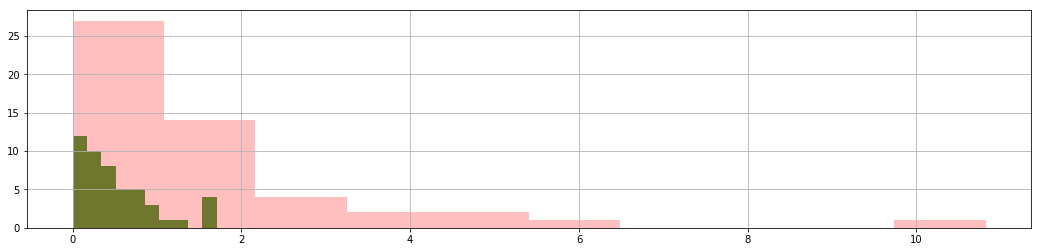

In [172]:

fig = plt.figure(figsize=(18, 4))
ax = fig.add_subplot(111, autoscale_on=True)
whites_AxesSubplot = pd.Series(white_homicide_rates).hist(ax=ax, bins=10, alpha=0.75, color='green')
europeans_AxesSubplot = pd.Series(european_homicide_rates).hist(ax=ax, bins=10, alpha=0.25,
                                                                color='red')

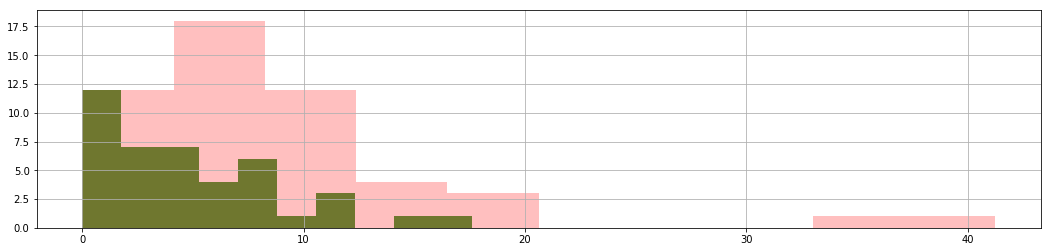

In [173]:

fig = plt.figure(figsize=(18, 4))
ax = fig.add_subplot(111, autoscale_on=True)
blacks_AxesSubplot = pd.Series(black_homicide_rates).hist(ax=ax, bins=10, alpha=0.75, color='green')
africans_AxesSubplot = pd.Series(african_homicide_rates).hist(ax=ax, bins=10, alpha=0.25,
                                                                color='red')

In [1]:
%%javascript
var kernel = IPython.notebook.kernel;
var body = document.body,  
    attribs = body.attributes;
var command = "notebook_path = " + "'"+attribs['data-notebook-path'].value+"'";
kernel.execute(command);

<IPython.core.display.Javascript object>

In [3]:
# %load ../../load_magic/nbviewer.py

from IPython.display import HTML

notebook_viewer_url = 'https://nbviewer.jupyter.org/github/dbabbitt/notebooks/blob/master/'
notebook_viewer_url += '/'.join(notebook_path.split('/')[1:])
html_str = 'Click <a href="{}" target="_blank">here</a> to view notebook in nbviewer.'
HTML(html_str.format(notebook_viewer_url))